In [9]:
## MP 573 Lecture 10: Recap of LSI, Fourier, Sampling
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

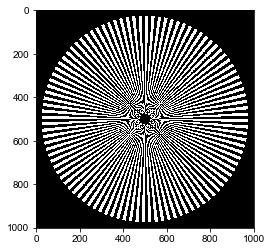

In [10]:
## Create a spokes pattern
N = 1001
x = np.linspace(-10,10,N)
y = np.linspace(-10,10,N)
X, Y = np.meshgrid(x,y)
RHO = np.sqrt(X**2+Y**2)
THETA = np.arctan2(Y,X)
f = np.greater(np.sin(THETA*100),0)
f[np.less(RHO,0.5)]=0
f[np.greater(RHO,9.5)]=0
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
imgplot = plt.imshow(f,cmap='gray')

In [12]:
def makeOTF(A):
    hhat = np.exp(-A*RHO/2)*np.cos(A*RHO) 
    ghat = fhat*hhat
    g = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(ghat)))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    font = {'weight' : 'normal',
            'size'   : 26}
    plt.rc('font', **font)
    imgplot = plt.plot(x,np.exp(-A*abs(x)/2)*np.cos(A*abs(x)) )

    plt.subplot(1,2,2)
    plt.rc('font', **font)
    imgplot = plt.imshow(abs(g),cmap='gray')

    return (g)

In [13]:
## Create interactive slide bar
y = interactive(makeOTF,A=(0,3,0.2))
display(y)

interactive(children=(FloatSlider(value=1.0, description='A', max=3.0, step=0.2), Output()), _dom_classes=('wi…